In [29]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Sequential API
---

In [2]:
model = keras.Sequential(name='my_first_example')
model.add(keras.Input(shape=(3,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "my_first_example"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

# Functional API
---

In [3]:
inputs   = keras.Input(shape=(3,))
features = layers.Dense(64, activation='relu')(inputs)
outputs  = layers.Dense(10, activation='softmax')(features)
model    = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
vocabulary_size = 1000
num_tags        = 100
num_departments = 4

title     = keras.Input(shape=(vocabulary_size,), name='title')
text_body = keras.Input(shape=(vocabulary_size,), name='text_body')
tags      = keras.Input(shape=(num_tags,), name='tags')

features  = layers.Concatenate()([title, text_body, tags])
features  = layers.Dense(64, activation='relu')(features)

priority   = layers.Dense(1, activation='sigmoid', name='priority')(features)
department = layers.Dense(num_departments, activation='softmax', name='department')(features)

model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ title (InputLayer)  │ (None, 1000)      │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ text_body           │ (None, 1000)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ tags (InputLayer)   │ (None, 100)       │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 2100)      │          0 │ title[0][0],      │
│ (Concatenate)       │                   │            │ text_body[0][0],  │
│                     │                   │            │ tags[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 64)        │    134,464 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ priority (Dense)    │ (None, 1)         │         65 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ department (Dense)  │ (None, 4)         │        260 │ dense_4[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 134,789 (526.52 KB)

 Trainable params: 134,789 (526.52 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
import numpy as np

num_samples = 1280

title_data     = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data      = np.random.randint(0,2 , size=(num_samples, num_tags))

priority_data   = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0,2 , size=(num_samples, num_departments))

model.compile(optimizer='rmsprop',
              loss={'priority' : 'mean_squared_error', 'department' : 'categorical_crossentropy'},
              metrics={'priority' : ['mean_absolute_error'], 'department' : ['accuracy']})

model.fit({'title' : title_data, 'text_body' : text_body_data, 'tags' : tags_data},
          {'priority' : priority_data, 'department' : department_data},
          epochs=1)

40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - department_accuracy: 0.2375 - department_loss: 4.4067 - loss: 4.5299 - priority_loss: 0.1232 - priority_mean_absolute_error: 0.2912


In [6]:
model.evaluate({'title' : title_data, 'text_body' : text_body_data, 'tags' : tags_data},
          {'priority' : priority_data, 'department' : department_data})

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - department_accuracy: 0.0775 - department_loss: 3.6931 - loss: 3.7944 - priority_loss: 0.1013 - priority_mean_absolute_error: 0.2692


[3.696855068206787,
 0.10057099908590317,
 3.5962836742401123,
 0.07968749850988388,
 0.2667195200920105]

In [7]:
[priority_preds, department_preds] = model.predict({'title' : title_data, 'text_body' : text_body_data, 'tags' : tags_data})
print(f'Priority predictions are: {priority_preds}')
print(f'Department predictions are: {department_preds}')

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Priority predictions are: [[0.2833716 ]
 [0.35096973]
 [0.3880872 ]
 ...
 [0.5636826 ]
 [0.36208087]
 [0.48825458]]
Department predictions are: [[0.13290884 0.03918122 0.32506806 0.50284183]
 [0.17331171 0.04660282 0.41256812 0.36751723]
 [0.06726607 0.04703494 0.3896852  0.49601373]
 ...
 [0.12110119 0.07668117 0.13259836 0.6696194 ]
 [0.12832507 0.01648486 0.35335314 0.5018369 ]
 [0.13545783 0.06025828 0.22482297 0.5794609 ]]


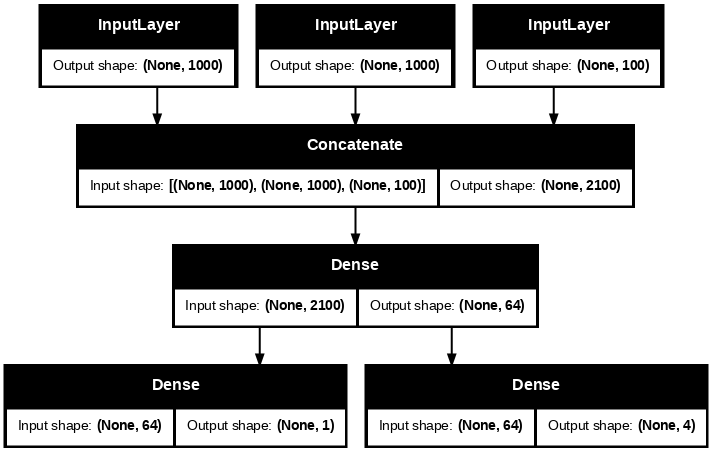

In [8]:
keras.utils.plot_model(model, 'ticket_classifier.png', show_shapes=True, dpi=72)

In [9]:
model.layers

[<InputLayer name=title, built=True>,
 <InputLayer name=text_body, built=True>,
 <InputLayer name=tags, built=True>,
 <Concatenate name=concatenate, built=True>,
 <Dense name=dense_4, built=True>,
 <Dense name=priority, built=True>,
 <Dense name=department, built=True>]

In [10]:
model.layers[3].output

<KerasTensor shape=(None, 2100), dtype=float32, sparse=False, name=keras_tensor_7>

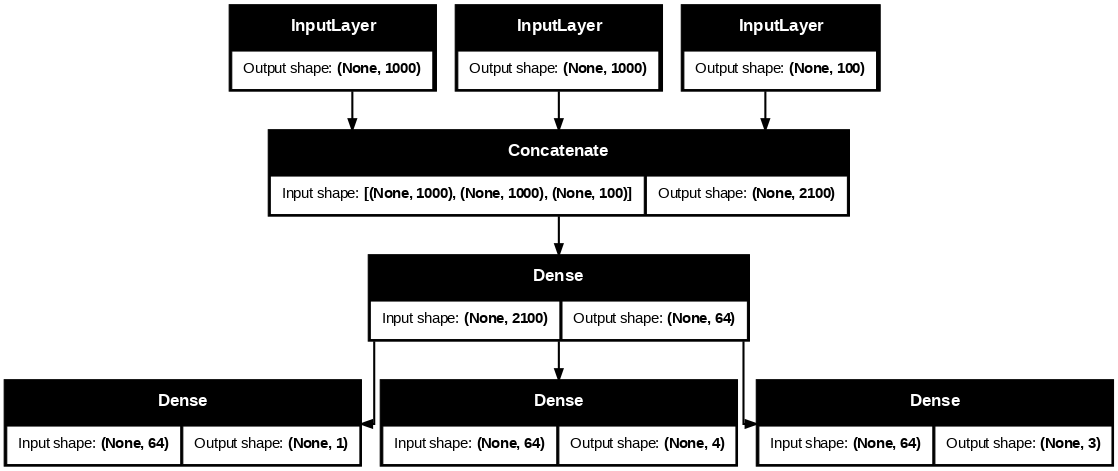

In [11]:
features = model.layers[4].output
difficulty = layers.Dense(3, activation='softmax', name='difficulty')(features)

new_model = keras.Model(inputs=[title, text_body, tags]
                        , outputs=[priority, department, difficulty])

keras.utils.plot_model(new_model, 'new_model_with_difficulty_layer.png', dpi=75
                       , show_shapes=True)

# Subclassing
---

In [12]:
class CustomerTickerModel(keras.Model):

  def __init__(self, num_departments):
    super().__init__()
    self.concat_layer          = layers.Concatenate()
    self.mixing_layer          = layers.Dense(64, activation='relu')
    self.priority_scorer       = layers.Dense(1, activation='sigmoid')
    self.department_classifier = layers.Dense(num_departments, activation='softmax')

  def call(self, inputs):
    title     = inputs['title']
    text_body = inputs['text_body']
    tags      = inputs['tags']

    features    = self.concat_layer([title, text_body, tags])
    features    = self.mixing_layer(features)
    priority    = self.priority_scorer(features)
    departments = self.department_classifier(features)
    return priority, department

model = CustomerTickerModel(num_departments=4)

In [13]:
priority, department = model(
    {'title' : title_data, 'text_body' : text_body_data, 'tags' : tags_data})

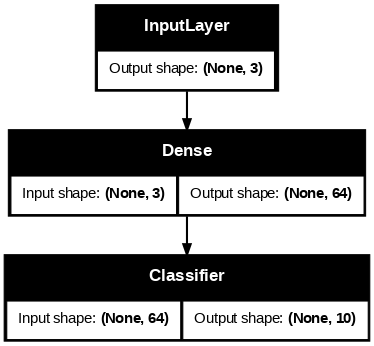

In [19]:
class Classifier(keras.Model):

  def __init__(self, num_classes=2):
    super().__init__()
    if num_classes == 2:
      num_units = 1
      activation = 'sigmoid'
    else:
      num_units = num_classes
      activation = 'softmax'
    self.dense = layers.Dense(units=num_units, activation=activation)

  def call(self, inputs):
    return self.dense(inputs)

inputs   = keras.Input(shape=(3,))
features = layers.Dense(64, activation='relu')(inputs)
outputs  = Classifier(num_classes=10)(features)
model    = keras.Model(inputs=inputs, outputs=outputs)

keras.utils.plot_model(model, 'subclassing_and_functional_api.png', dpi=75
                       , show_shapes=True)

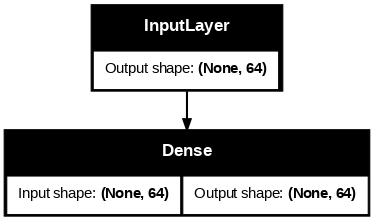

In [20]:
inputs = keras.Input(shape=(64,))
outputs = layers.Dense(64, activation='relu')(inputs)
binary_classifier = keras.Model(inputs=inputs, outputs=outputs)

keras.utils.plot_model(binary_classifier, 'binary_classifier.png', dpi=75
                       , show_shapes=True)

In [22]:
class MyModel(keras.Model):
  def __init__(self, num_classes=2):
    super().__init__()
    self.dense = layers.Dense(64, activation='relu')
    self.classifier = binary_classifier

  def call(self, inputs):
    features = self.dense(inputs)
    return self.classifier(features)

model = MyModel()

# Writing your own metrics
---

In [28]:
from tensorflow.keras.datasets import mnist

def get_mnist_model():
  inputs   = keras.Input(shape=(28*28,))
  features = layers.Dense(512, activation='relu')(inputs)
  features = layers.Dropout(0.5)(features)
  outputs  = layers.Dense(10, activation='softmax')(features)
  model    = keras.Model(inputs=inputs, outputs=outputs)
  return model

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28)).astype('float32')/255
test_images  = test_images.reshape((10000, 28 * 28)).astype('float32')/255

partial_train_images, val_images = train_images[10000:], train_images[10000:]
partial_train_labels, val_labels = train_labels[10000:], train_labels[10000:]

model = get_mnist_model()

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_train_images, partial_train_labels
          , epochs=3
          , validation_data=(val_images, val_labels))

test_metrics = model.evaluate(test_images, test_labels)

predictions = model.predict(test_images)

Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.8645 - loss: 0.4561 - val_accuracy: 0.9609 - val_loss: 0.1296
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9519 - loss: 0.1658 - val_accuracy: 0.9727 - val_loss: 0.0959
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9631 - loss: 0.1273 - val_accuracy: 0.9801 - val_loss: 0.0719
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9699 - loss: 0.1058
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [39]:
class RootMeanSquaredError(keras.metrics.Metric):
  def __init__(self, name='rmse', **kwargs):
    super().__init__(name='rmse', **kwargs)
    self.mse_sum = self.add_weight(name='mse_sum', initializer='zeros')
    self.total_samples = self.add_weight(
        name='total_sampes', initializer='zeros', dtype='int32')

  def update_state(self, y_true, y_pred, sample_weight=None):
    y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[1])
    mse = tf.reduce_sum(tf.square(y_true - y_pred))
    self.mse_sum.assign_add(mse)
    num_samples = tf.shape(y_pred)[0]
    self.total_samples.assign_add(num_samples)

  def result(self):
    return tf.sqrt(self.mse_sum / tf.cast(self.total_samples, tf.float32))

  def reset_state(self):
    self.mse_sum.assign(0.)
    self.total_samples.assign(0)

model_2 = get_mnist_model()

model_2.compile(optimizer='rmsprop',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy', RootMeanSquaredError()])

model_2.fit(partial_train_images, partial_train_labels
           , epochs=3
           , validation_data=(val_images, val_labels))

test_metrics_2 = model.evaluate(test_images, test_labels)

Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.8658 - loss: 0.4498 - rmse: 0.4379 - val_accuracy: 0.9591 - val_loss: 0.1406 - val_rmse: 0.2501
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9517 - loss: 0.1689 - rmse: 0.2729 - val_accuracy: 0.9738 - val_loss: 0.0918 - val_rmse: 0.2011
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.9638 - loss: 0.1245 - rmse: 0.2344 - val_accuracy: 0.9773 - val_loss: 0.0745 - val_rmse: 0.1850
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9699 - loss: 0.1058
